In [51]:
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy.editor import *

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

[30, 49, 38, 34, 30, 13, 25, 23, 38, 36, 16, 5, 35, 28, 19, 10, 1, 11, 13, 9]
[30, 49, 38, 34, 30, 13, 25, 23, 38, 36, 16, 5, 35, 28, 19, 10, 1, 11, 13, 9]
[30, 49, 38, 34, 30, 13, 25, 23, 38, 36, 16, 5, 35, 28, 19, 10, 1, 11, 13, 9]
[30, 49, 38, 34, 30, 13, 25, 23, 38, 36, 16, 5, 35, 28, 19, 10, 1, 11, 13, 9]
[30, 49, 38, 34, 30, 13, 25, 23, 38, 36, 16, 5, 35, 28, 19, 10, 1, 11, 13, 9]
[30, 49, 38, 34, 30, 13, 25, 23, 38, 36, 16, 5, 35, 28, 19, 10, 1, 11, 13, 9]
[30, 49, 38, 34, 30, 13, 25, 23, 38, 36, 16, 5, 35, 28, 19, 10, 1, 11, 13, 9]
[30, 49, 38, 34, 30, 13, 25, 23, 38, 36, 16, 5, 35, 28, 19, 10, 1, 11, 13, 9]
[30, 49, 38, 34, 30, 13, 25, 23, 38, 36, 16, 5, 35, 28, 19, 10, 1, 11, 13, 9]
[30, 49, 38, 34, 30, 13, 25, 23, 38, 36, 16, 5, 35, 28, 19, 10, 1, 11, 13, 9]
[30, 49, 38, 34, 30, 13, 25, 23, 38, 36, 16, 5, 35, 28, 19, 10, 1, 11, 13, 9]
[30, 49, 38, 34, 30, 13, 25, 23, 38, 36, 16, 5, 35, 28, 19, 10, 1, 11, 13, 9]
[30, 49, 38, 34, 30, 13, 25, 23, 38, 36, 16, 5, 35, 28, 19, 10, 

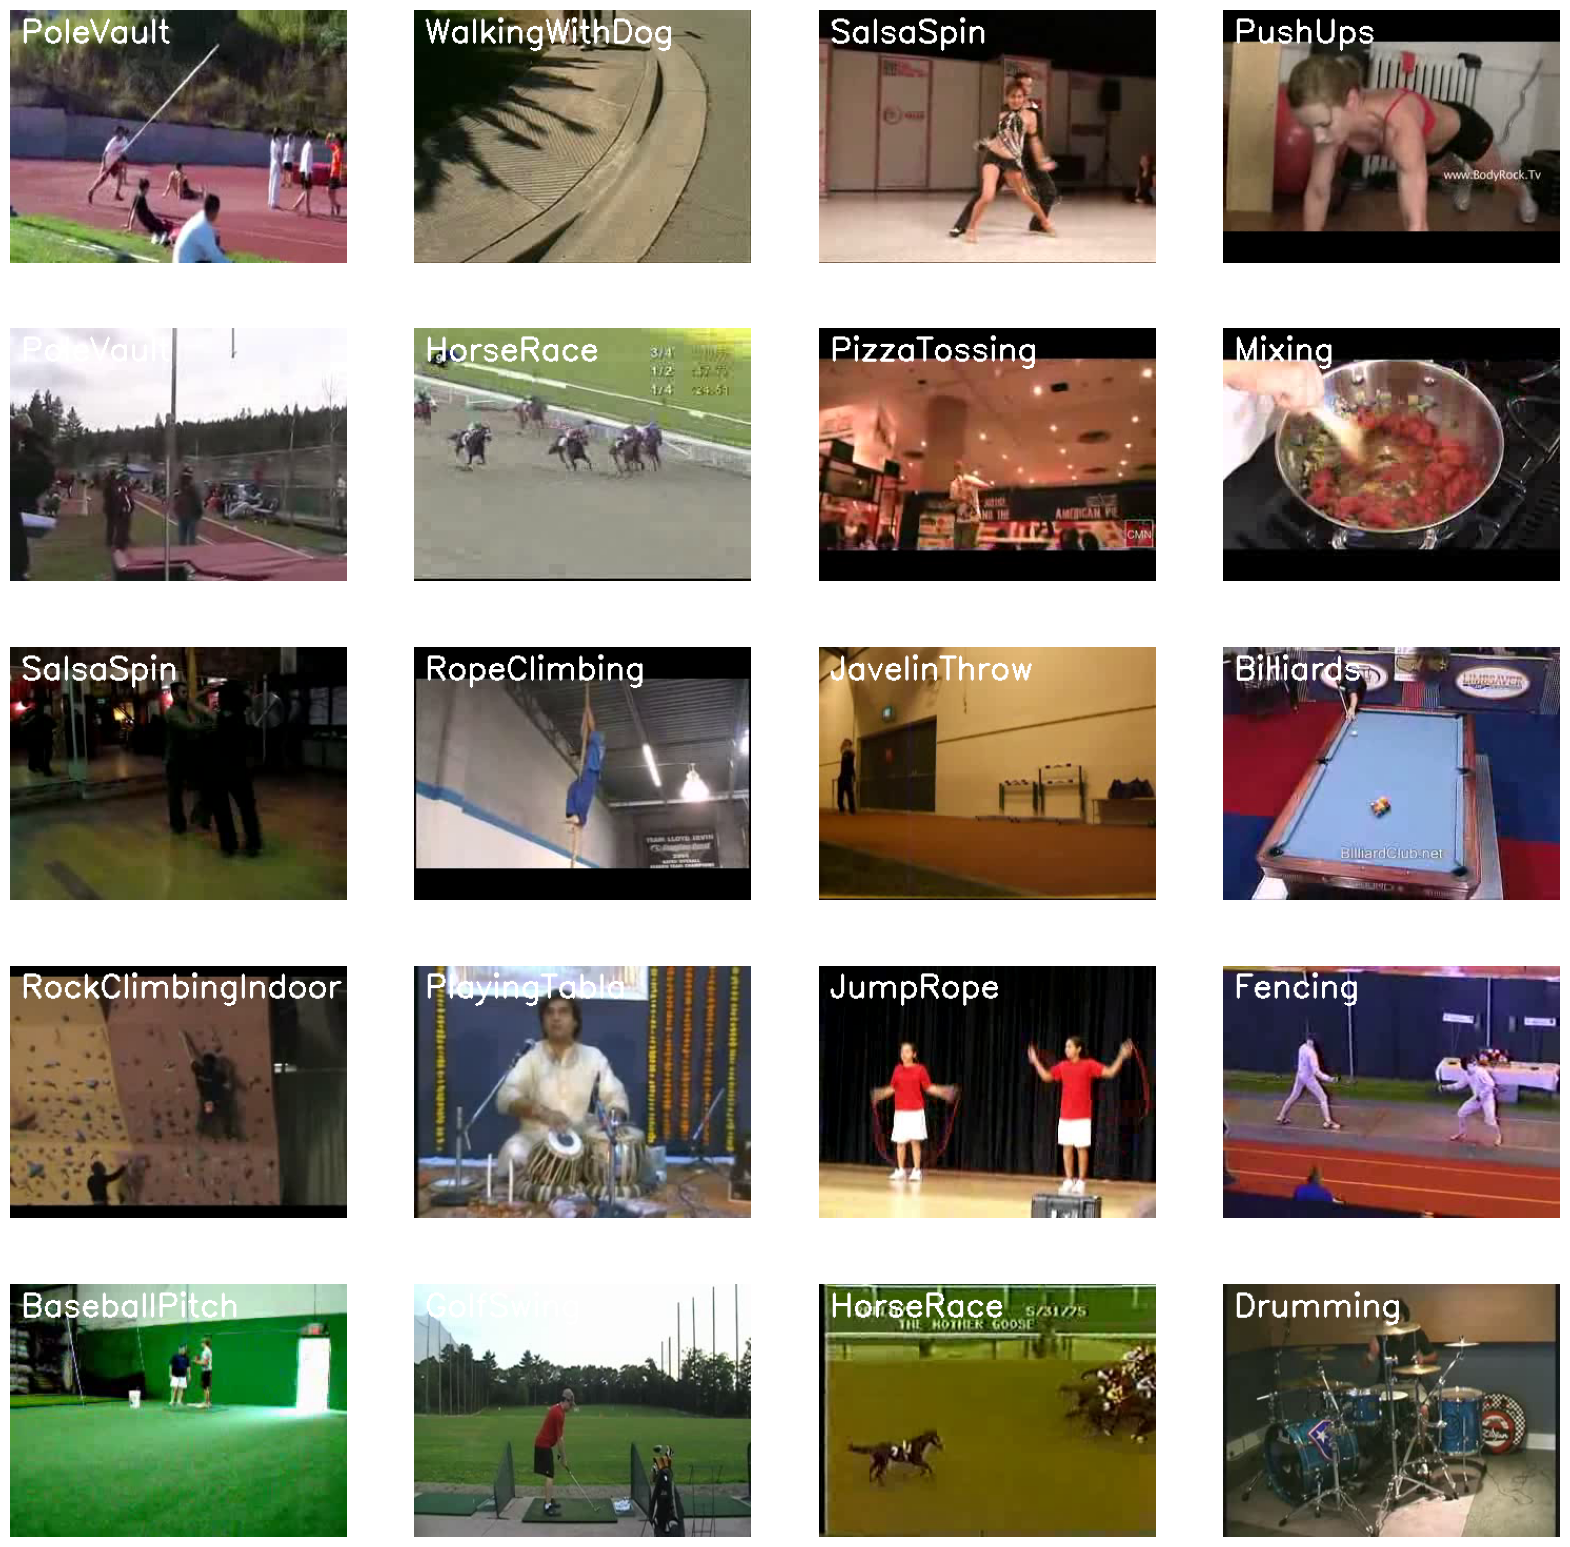

In [53]:
plt.figure(figsize= (20, 20))

all_classes_names = os.listdir('../datasets/UCF50/UCF50/')

random_range = random.sample(range(len(all_classes_names)), 20)
random_range = [random.randint(0, len(all_classes_names)) for _ in range(20)]

for counter, random_index in enumerate(random_range, 1):
    print(random_range)

    selected_class_Name = all_classes_names[random_index]

    video_files_names_list = os.listdir(f'../datasets/UCF50/UCF50/{selected_class_Name}')

    selected_video_file_name = random.choice(video_files_names_list)

    video_reader = cv2.VideoCapture(f'../datasets/UCF50/UCF50/{selected_class_Name}/{selected_video_file_name}')

    _, bgr_frame = video_reader.read()
    
    video_reader.release()

    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    plt.subplot(5, 4, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

In [58]:
IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64

SEQUENCE_LENGTH = 20

DATASET_DIR = "../datasets/UCF50/UCF50"

CLASSED_LIST = ["Basketball", "Biking", "PullUps", "HighJump"]

In [55]:
def frames_extraction(video_path):
    frames_list = []
    video_reader = cv2.VideoCapture(video_path)
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    skip_frames_window = max(int(video_frames_count / SEQUENCE_LENGTH), 1)

    for frame_counter in range(SEQUENCE_LENGTH):
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
        success, frame = video_reader.read()

        if not success:
            break
        
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        normalized_frame = resized_frame / 255
        frames_list.append(normalized_frame)
        
    video_reader.release()
    return frames_list

In [ ]:
frames = frames_extraction("../datasets/UCF50/UCF50/Swing/v_Swing_g01_c01.avi")
frames

[array([[[0.46666667, 0.81176471, 0.69411765],
         [0.55686275, 0.89803922, 0.78039216],
         [0.36078431, 0.70196078, 0.58431373],
         ...,
         [0.        , 0.26666667, 0.12156863],
         [0.        , 0.2       , 0.06666667],
         [0.15294118, 0.37254902, 0.24313725]],
 
        [[0.2745098 , 0.61568627, 0.49803922],
         [0.26666667, 0.60392157, 0.48627451],
         [0.2745098 , 0.61568627, 0.49803922],
         ...,
         [0.01960784, 0.32156863, 0.17647059],
         [0.        , 0.16078431, 0.02745098],
         [0.12156863, 0.34117647, 0.21176471]],
 
        [[0.25098039, 0.59215686, 0.4745098 ],
         [0.49803922, 0.83921569, 0.72156863],
         [0.29411765, 0.63529412, 0.51764706],
         ...,
         [0.3372549 , 0.65098039, 0.50588235],
         [0.        , 0.14117647, 0.00784314],
         [0.09019608, 0.30980392, 0.18039216]],
 
        ...,
 
        [[0.11372549, 0.32156863, 0.2627451 ],
         [0.        , 0.19607843, 0.13725

In [56]:
def create_dataset():
    features = []
    labels = []
    video_files_paths = []

    for class_index, class_name in enumerate(CLASSED_LIST):
        print(class_name)

        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))

        for file_name in files_list:
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)

            frames = frames_extraction(video_file_path)

            if len(frames) == SEQUENCE_LENGTH:
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)
    
    features = np.array(features)
    labels = np.array(labels)
    video_files_paths = np.array(video_files_paths)

    return features, labels, video_files_paths

In [59]:
features, labels, video_files_paths = create_dataset()

Basketball
Biking
PullUps
HighJump


In [60]:
one_hot_encoding_labels = to_categorical(labels)

In [61]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoding_labels, test_size=0.25, shuffle=True)

In [62]:
def create_convlstm_model():

    model = Sequential()

    model.add(ConvLSTM2D(filters=4, kernel_size=(3, 3), activation='tanh', data_format="channels_last",
                         recurrent_dropout=0.2, return_sequences=True, input_shape=(SEQUENCE_LENGTH,
                                                                                    IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format="channels_last"))
    model.add(TimeDistributed(Dropout(0.2)))

    model.add(ConvLSTM2D(filters=8, kernel_size=(3, 3), activation='tanh', data_format="channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format="channels_last"))
    model.add(TimeDistributed(Dropout(0.2)))

    model.add(ConvLSTM2D(filters=14, kernel_size=(3, 3), activation='tanh', data_format="channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format="channels_last"))
    model.add(TimeDistributed(Dropout(0.2)))

    model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3), activation='tanh', data_format="channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format="channels_last"))
    model.add(TimeDistributed(Dropout(0.2)))

    model.add(Flatten())

    model.add(Dense(len(CLASSED_LIST), activation='softmax'))

    model.summary()

    return model

In [63]:
convlstm_model = create_convlstm_model()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_16 (ConvLSTM2D)  (None, 20, 62, 62, 4)    1024      
                                                                 
 max_pooling3d_16 (MaxPoolin  (None, 20, 31, 31, 4)    0         
 g3D)                                                            
                                                                 
 time_distributed_16 (TimeDi  (None, 20, 31, 31, 4)    0         
 stributed)                                                      
                                                                 
 conv_lstm2d_17 (ConvLSTM2D)  (None, 20, 29, 29, 8)    3488      
                                                                 
 max_pooling3d_17 (MaxPoolin  (None, 20, 15, 15, 8)    0         
 g3D)                                                            
                                                      

In [ ]:
# plot_model(convlstm_model, to_file="convlstm_model.png", show_shapes=True, show_layer_names=True)

In [64]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

convlstm_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=["accuracy"])

convlstm_model_training_histoty = convlstm_model.fit(x=features_train, y=labels_train, epochs=10, batch_size=4,
                                                     shuffle=True, validation_split=0.2,
                                                     callbacks=[early_stopping_callback])

Epoch 1/10
79/79 [==============================] - 42s 456ms/step - loss: 1.3215 - accuracy: 0.3981 - val_loss: 1.2832 - val_accuracy: 0.3671
Epoch 2/10
79/79 [==============================] - 35s 440ms/step - loss: 1.0364 - accuracy: 0.6051 - val_loss: 1.1127 - val_accuracy: 0.5696
Epoch 3/10
79/79 [==============================] - 36s 453ms/step - loss: 0.8478 - accuracy: 0.6592 - val_loss: 0.9385 - val_accuracy: 0.5949
Epoch 4/10
79/79 [==============================] - 35s 448ms/step - loss: 0.6404 - accuracy: 0.7325 - val_loss: 0.7417 - val_accuracy: 0.6709
Epoch 5/10
79/79 [==============================] - 35s 447ms/step - loss: 0.5343 - accuracy: 0.8185 - val_loss: 0.8336 - val_accuracy: 0.6709
Epoch 6/10
79/79 [==============================] - 35s 446ms/step - loss: 0.3953 - accuracy: 0.8567 - val_loss: 0.8008 - val_accuracy: 0.6835
Epoch 7/10
79/79 [==============================] - 35s 446ms/step - loss: 0.3708 - accuracy: 0.8662 - val_loss: 0.7009 - val_accuracy: 0.6962

In [65]:
model_evaluation_histroy = convlstm_model.evaluate(features_test, labels_test)

5/5 [==============================] - 1s 77ms/step - loss: 1.1243 - accuracy: 0.6818


In [66]:
model_evaluation_history = convlstm_model.evaluate(features_test, labels_test)

model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)

model_file_name = f'convlstm_model__Date_Time_{current_date_time_string}__Loss_{model_evaluation_loss}__Accuracy_{model_evaluation_accuracy}.h5'
convlstm_model.save(model_file_name)

5/5 [==============================] - 1s 82ms/step - loss: 1.1243 - accuracy: 0.6818


In [67]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]

    epochs = range(len(metric_value_1))

    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    plt.title(str(plot_name))
    
    plt.legend()

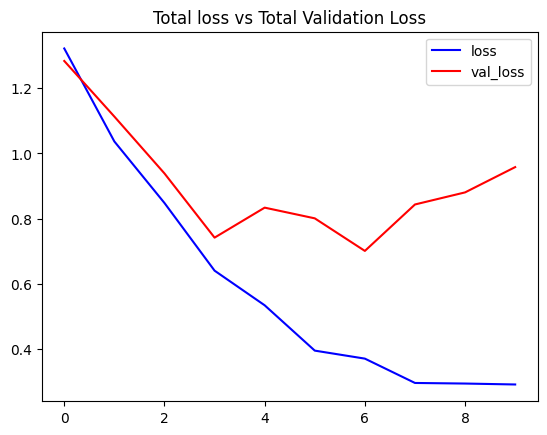

In [68]:
plot_metric(convlstm_model_training_histoty, 'loss', 'val_loss', 'Total loss vs Total Validation Loss')

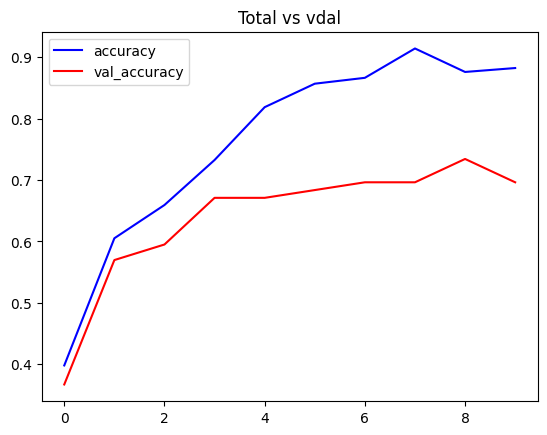

In [69]:
plot_metric(convlstm_model_training_histoty, 'accuracy', 'val_accuracy', 'Total vs vdal')

In [71]:
def create_LRCN_model():
    model = Sequential()

    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation='relu'),
                              input_shape=(SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    model.add(TimeDistributed(MaxPooling2D(4, 4)))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation='relu')))
    model.add(TimeDistributed(MaxPooling2D(4, 4)))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation='relu')))
    model.add(TimeDistributed(MaxPooling2D(2, 2)))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation='relu')))
    model.add(TimeDistributed(MaxPooling2D(2, 2)))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Flatten()))

    model.add(LSTM(32))

    model.add(Dense(len(CLASSED_LIST), activation='softmax'))

    model.summary()

    return model

In [72]:
LRCN_model = create_LRCN_model()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_20 (TimeDi  (None, 20, 64, 64, 16)   448       
 stributed)                                                      
                                                                 
 time_distributed_21 (TimeDi  (None, 20, 16, 16, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_22 (TimeDi  (None, 20, 16, 16, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_23 (TimeDi  (None, 20, 16, 16, 32)   4640      
 stributed)                                                      
                                                                 
 time_distributed_24 (TimeDi  (None, 20, 4, 4, 32)    

In [73]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

LRCN_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=["accuracy"])

LRCN_model_training_histoty = LRCN_model.fit(x=features_train, y=labels_train, epochs=100, batch_size=4,
                                                     shuffle=True, validation_split=0.2,
                                                     callbacks=[early_stopping_callback])

Epoch 1/100
79/79 [==============================] - 3s 15ms/step - loss: 1.3957 - accuracy: 0.2771 - val_loss: 1.3749 - val_accuracy: 0.2405
Epoch 2/100
79/79 [==============================] - 1s 7ms/step - loss: 1.3679 - accuracy: 0.3025 - val_loss: 1.3896 - val_accuracy: 0.2278
Epoch 3/100
79/79 [==============================] - 1s 6ms/step - loss: 1.3437 - accuracy: 0.3408 - val_loss: 1.2228 - val_accuracy: 0.5443
Epoch 4/100
79/79 [==============================] - 1s 7ms/step - loss: 1.1624 - accuracy: 0.4713 - val_loss: 1.0926 - val_accuracy: 0.5949
Epoch 5/100
79/79 [==============================] - 1s 7ms/step - loss: 0.9484 - accuracy: 0.6115 - val_loss: 0.8702 - val_accuracy: 0.6835
Epoch 6/100
79/79 [==============================] - 1s 7ms/step - loss: 0.7336 - accuracy: 0.7293 - val_loss: 0.7967 - val_accuracy: 0.6835
Epoch 7/100
79/79 [==============================] - 1s 7ms/step - loss: 0.5505 - accuracy: 0.8121 - val_loss: 0.7739 - val_accuracy: 0.7215
Epoch 8/100


In [76]:
model_evaluation_histroy = LRCN_model.evaluate(features_test, labels_test)

5/5 [==============================] - 0s 8ms/step - loss: 0.3979 - accuracy: 0.8864


In [77]:
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)

model_file_name = f'convlstm_model__Date_Time_{current_date_time_string}__Loss_{model_evaluation_loss}__Accuracy_{model_evaluation_accuracy}.h5'
LRCN_model.save(model_file_name)

5/5 [==============================] - 0s 44ms/step - loss: 0.3979 - accuracy: 0.8864


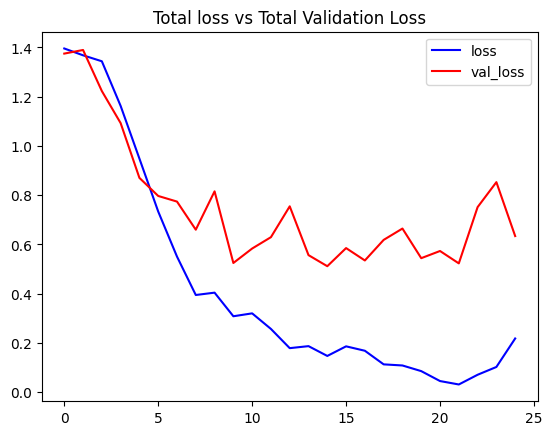

In [78]:
plot_metric(LRCN_model_training_histoty, 'loss', 'val_loss', 'Total loss vs Total Validation Loss')

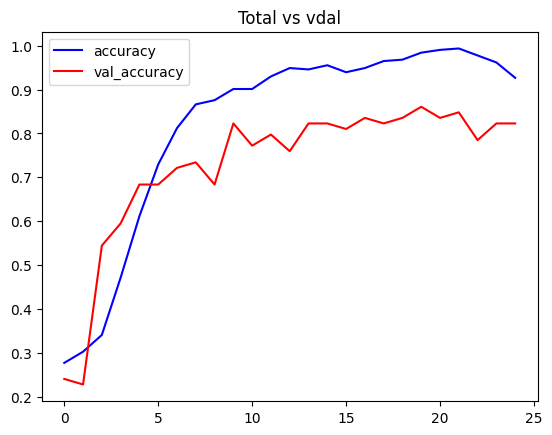

In [79]:
plot_metric(LRCN_model_training_histoty, 'accuracy', 'val_accuracy', 'Total vs vdal')

In [80]:
def predict_on_video(video_file_path, output_file_path, SEQUENCE_LENGTH):
    video_reader = cv2.VideoCapture(video_file_path)
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'),
                                   video_reader.get(cv2.CAP_PROP_FPS), (original_video_width, original_video_height))
    frames_queue = deque(maxlen=SEQUENCE_LENGTH)
    
    predict_class_name = ""

    while video_reader.isOpened():
        ok, frame = video_reader.read()

        if not ok:
            break

        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))

        normalized_frame = resized_frame / 255

        frames_queue.append(normalized_frame)

        if len(frames_queue) == SEQUENCE_LENGTH:
            predicted_labels_probabilities = LRCN_model.predict(np.expand_dims(frames_queue, axis=0))[0]
            predicted_label = np.argmax(predicted_labels_probabilities)
            predict_class_name = CLASSED_LIST[predicted_label]
        
        cv2.putText(frame, predict_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        video_writer.write(frame)

    video_reader.release()
    video_writer.release()

In [85]:
predict_on_video('../datasets/UCF50/videoplayback.mp4', 'predicted_videoplayback.mp4', SEQUENCE_LENGTH)


1/1 [==============================] - 0s 14ms/step
